# <center> Project 01: Clustering and segmentation </center>

## <center> Python tutorial </center>

This is a complementary tutorial with the methods and functions that you will need to use for successfully solve the project. You can use it as a knowledge base during the curse together with first tutorial that you completed before starting the course.

First we will import the necessary libraries. Note that you will need to install new libraries, such as `seaborn`. You can use `pip` or `conda` to install them.

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits import mplot3d
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

## Filtering null values in Pandas

First we will explore a DataFrame and look for null values in order to eliminate rows that are not complete. 

First we can use `.isnull()` or `.isna()` to see if a DataFrame has empty values. More information about missing values here: https://dev.to/discdiver/the-weird-world-of-missing-values-in-pandas-3kph

In [3]:
# We create an example dataframe. note tha there are different empty values as np.nan
df = pd.DataFrame({'age': [5, 6, np.NaN],
                    'born': [pd.NaT, pd.Timestamp('1939-05-27'),
                             pd.Timestamp('1940-04-25')],
                    'name': ['Alfred', 'Batman', 'Joker'],
                    'toy': [np.NaN, 'Batmobile', 'Smile']})
df

,age,born,name,toy
0,5.0,NaT,Alfred,NaN
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,Joker,Smile


In [4]:
df.isna() #isna returns True if NaN.

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


Now we can filter the rows. In this case, we don't care if we lack of the age because we can calculate it later. So we will exclude those that don't have a born date.

In [5]:
df2=df[df['born'].isna()==False]
print("The resulted lenght is:", len(df2))
df2

The resulted lenght is: 2


,age,born,name,toy
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,Joker,Smile


If we would like to filter with more than one condition you can use the AND condition with `&`. Alternativelly, you can use `|` as an OR condition. More about why `&` and `|` are used instead of `and` and `or` here: https://stackoverflow.com/questions/20691508/why-does-pandas-use-instead-of-the-normal-pythonic-and-or

In [9]:
df=df[(df['age'].isna()==False) & (df['toy'].isna()==False)]
print("The resulted lenght is:", len(df))
df

The resulted lenght is: 1


,age,born,name,toy
1,6.0,1939-05-27,Batman,Batmobile


As a good practice, it is recommended to delete those variables that you no longer use. This will free kernel's memory.

In [10]:
del df, df2

## Creating a plot with seaborn

`seaborn` is an alternative library for creating graphs and plots. It is easier than `matplotlib` to deploy any plot, however it is more limited. But it is excelent for explorating datasets. 

In [11]:
#First, create a new matrix

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000) #creates a random dataset
s

array([ 2.43559848e-02,  2.73943025e-02,  1.18723237e-01,  1.05928779e-02,
       -1.46057466e-01, -8.92420660e-02,  1.41903007e-01,  1.19777478e-01,
       -2.49035125e-02, -1.29506770e-01,  3.71153930e-02,  9.98775520e-02,
        1.43150782e-01,  9.90314753e-02, -2.42815250e-02,  1.65595313e-02,
        1.54379843e-01, -2.96564106e-01,  5.39775640e-02, -4.68178141e-02,
        1.29337347e-01, -2.76265078e-01, -2.25681828e-01, -2.44929378e-02,
       -1.05999839e-03, -6.62436118e-03,  3.14363986e-03, -1.83678687e-01,
       -4.36701098e-02,  1.45323402e-01,  1.77963438e-02, -7.31622719e-02,
        4.24001625e-02, -7.31534878e-02,  5.62898034e-02, -8.81608819e-02,
       -1.49830748e-01, -2.68548512e-02,  9.78970318e-02, -6.64037191e-02,
       -8.29717990e-02, -4.04256387e-02, -5.73763313e-02, -1.43058976e-03,
       -1.32493126e-02,  3.36467541e-02, -1.82238529e-01, -2.06790240e-02,
       -2.49249643e-02,  1.53024278e-01, -1.14114634e-01, -8.26026276e-02,
       -7.27628020e-02, -

We will use `seaborn`'s [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to generate a plot that shows the univariate distribution of observations.

/home/alejandro/Sync/Computer_Engineering/Machine_Learning/Seminars_and_Labs/.venv/lib64/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


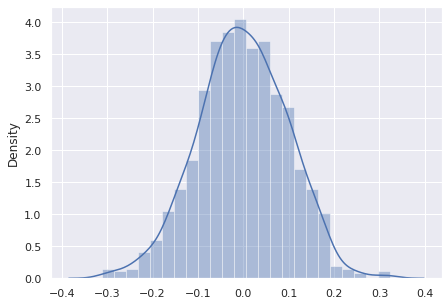

In [14]:
sns.set(rc={'figure.figsize':(7,5)}) # Defines the size of the plot
sns.distplot(s)  # By using kde=False you can hide the kernel density estimate
plt.show()

/home/alejandro/Sync/Computer_Engineering/Machine_Learning/Seminars_and_Labs/.venv/lib64/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


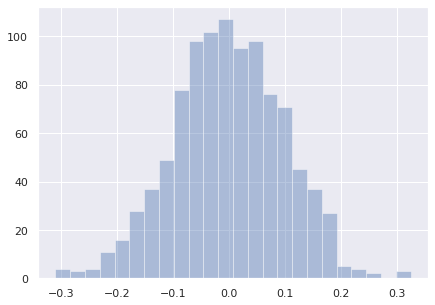

In [15]:
sns.distplot(s, kde=False)  # You can hide the gaussian kernel density estimate 
plt.show()

In [0]:
del s

## 2D and 3D scatters with matplotlib

We already introduced matplotlib and also scatter plots in 2D. But we can also plot 3D graphics.

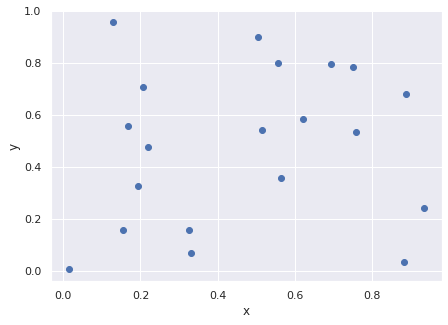

In [16]:
# Create a new three dimensional DataFrame 
df= pd.DataFrame({'x':np.random.sample(20), 'y': np.random.sample(20), 'z': np.random.sample(20)})

#Let's plot a 2D scatter
plt.scatter(df.loc[:,'x'], df.loc[:,'y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

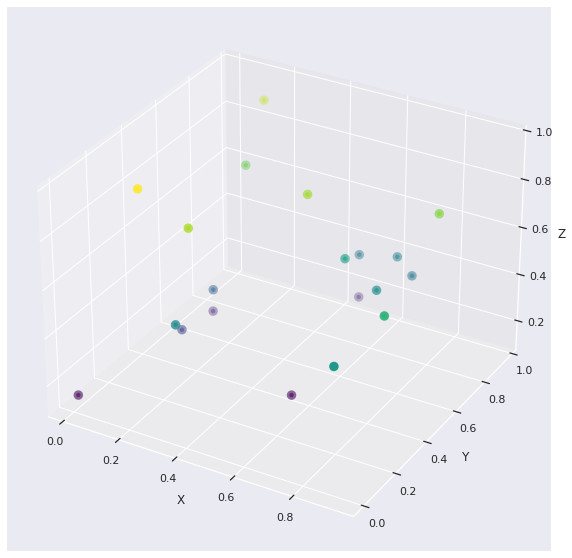

In [17]:
# Now create a 3D scatter plot
#Solution
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
X=df.loc[:,'x'].values
Y=df.loc[:,'y'].values
Z=df.loc[:,'z'].values

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(X, Y, Z, c=Z, cmap='viridis', linewidth=5);
plt.show()

In the above plot, we used a color map called `viridis`, you can use different type of interesting [colormaps](https://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps).


## Using Sklearn for calculating K-Means

The previous function resulted useful to easily calculate the k-means clusters. However, there is an easier way. `Sklearn` has its own function [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [19]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

print ("Achieved with:\n", kmeans.n_iter_, ' iterations')
print ("The labels are:\n", kmeans.labels_)  
print ("The centroids are:\n", kmeans.cluster_centers_)  

Achieved with:
 2  iterations
The labels are:
 [0 1 2 2 0 0 1 0 1 1 0 1 0 0 2 0 2 2 1 0]
The centroids are:
 [[0.73281101 0.59265272 0.53375386]
 [0.24850352 0.29682024 0.2836418 ]
 [0.26579274 0.50286297 0.86621591]]


Alternativelly, you can use `fit_predict()` method to compute cluster centers and predict cluster index for each sample.

In [20]:
kmeans.fit_predict(df)

array([0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0],
      dtype=int32)

And you can predict the closest cluster for each sample

In [22]:
kmeans.predict([[0, 3, 12]])

array([2], dtype=int32)

## Evaluating a cluster method with a Silhouette fuction

[Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette#sklearn.metrics.silhouette_score) is a metric to measure the *quality* of the clustering process. 
You can use the `silhouette_score` from sklearn to calculate the score, providing the original dataframe and the kmeans' labels.

In [0]:
silhouette_score(df, kmeans.labels_)

0.5896201739837121

Additionally, it is possible to compute the Silhouette Coefficient for each sample.

The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves. Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

In [0]:
silhouette_samples(df, kmeans.labels_)

array([0.73333866, 0.53799465, 0.56656443, 0.51335486, 0.62688265,
       0.64337258, 0.5754196 , 0.62064826, 0.55074715, 0.48608876,
       0.64796431, 0.57457467, 0.54311281, 0.58945543, 0.66278664,
       0.47621605, 0.73503884, 0.63461493, 0.6055265 , 0.46870167])

## Using Sklearn for clustering with a Gaussian Mixture

You've already learnt how to calculate clusters with [Gaussian Mixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) by hand. The sklearn comes with an embedded function to do it without complications.

In [0]:
gm = GaussianMixture(n_components=3, init_params="kmeans", covariance_type="full")
# The important parameters are the number of components `n_components`
# and the type of covariance used, that can be: 
# 'spherical', 'diag', 'tied' or 'full'
# You can also use a method to initialize the weights, the means and the precisions:  
# 'kmeans' or 'random'

In [0]:
# After defining the function's parameters, we can fit the DataFrame into the model
gm.fit(df)
print ("The means are:\n", gm.means_)
print ("The covariances are:\n", gm.covariances_)


The means are:
 [[0.17226806 0.64019237 0.59348375 1.        ]
 [0.39626556 0.27664298 0.45137159 2.        ]
 [0.84835012 0.77622798 0.73167618 0.        ]]
The covariances are:
 [[[ 6.43493103e-03 -3.13643085e-03  9.88770857e-04  6.16297582e-33]
  [-3.13643085e-03  4.47893515e-02 -1.42267541e-02  2.77333912e-32]
  [ 9.88770857e-04 -1.42267541e-02  4.68713499e-02  1.84889275e-32]
  [ 6.16297582e-33  2.77333912e-32  1.84889275e-32  1.00000000e-06]]

 [[ 6.27061595e-02  5.04586595e-03  1.85356947e-02  1.72563323e-32]
  [ 5.04586595e-03  1.67425134e-02 -3.28190120e-03  1.97215226e-32]
  [ 1.85356947e-02 -3.28190120e-03  5.60191591e-02  3.94430453e-32]
  [ 1.72563323e-32  1.97215226e-32  3.94430453e-32  1.00000000e-06]]

 [[ 5.18627669e-03  1.56143912e-02 -1.66285491e-02  0.00000000e+00]
  [ 1.56143912e-02  4.70205186e-02 -5.00734457e-02  0.00000000e+00]
  [-1.66285491e-02 -5.00734457e-02  5.33267261e-02  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e-06]]

In [0]:
# Here you can also use the fit_predict function
gm.fit_predict(df)

array([2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2])




That is all for now, you are ready to start working on Project 1!